# NPV Mini Project

# Muthu Krishnan L

In [ ]:
## Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
## Importing dataset
df_emp = pd.read_csv('emp_health.csv')

In [3]:
##reading some rows of dataset
df_emp.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [7]:
## Datatypes of all feautures
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [8]:
## Statisticalproperties of data
df_emp.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
# 1. How many employees above 50 age smoke, what is their average expenditure on health management ?
num = len(df_emp[(df_emp['smoke'] == 'yes') & (df_emp['age'] > 50)])
avg_exp = df_emp[(df_emp['smoke'] == 'yes') & (df_emp['age'] > 50)]['expenditure'].mean()
print('Number of employees who smoke above 50 are                                  :',num)
print('Average Expenditure on health management of employees who smoke above 50 is :',round(avg_exp,2))

Number of employees who smoke above 50 are                                  : 64
Average Expenditure on health management of employees who smoke above 50 is : 38820.22


In [30]:
# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees ?
fem = df_emp[df_emp['sex']=='female']
fem1 = df_emp[(df_emp['sex']=='female') & (df_emp['alcohol'] != 'daily')]
print('Number of female employees who did not consume alcohol daily are                                 :', len(fem1))
print('Proportion of female employees who did not consume alcohol daily w.r.t total female employees is :', len(fem1)/len(fem))

Number of female employees who did not consume alcohol daily are                                 : 453
Proportion of female employees who did not consume alcohol daily w.r.t total female employees is : 0.6842900302114804


In [51]:
# 3. Display zone wise average expeniture of employees on health.
df_emp.groupby('zone').expenditure.mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

In [72]:
# 4. Employees of which zone did maximum expenditure on health .
df_emp.groupby('zone').max()

,id,age,sex,bmi,dependent,alcohol,smoke,expenditure
zone,,,,,,,,
east,i11346,64,male,50.380,5,weekend,yes,58571.07448
north,i10307,64,male,48.070,5,weekend,yes,48549.17835
northeast,i10908,64,male,44.745,4,weekend,yes,46255.11250
northwest,i10909,64,male,42.940,4,weekend,yes,55135.40209
south,i10309,63,male,49.060,4,weekend,yes,47055.53210
southeast,i11347,64,male,53.130,5,weekend,yes,63770.42801
southwest,i11348,64,male,46.700,5,weekend,yes,52590.82939
west,i11349,64,male,47.600,5,weekend,yes,60021.39897


In [ ]:
## By looking into above table we can tell that west zone people did maximum expenditure on health.

In [76]:
#5. What is the minimum expenditure done by any employee in an organization 
print('Minimum Expenditure done by any employee in organization is :',df_emp['expenditure'].min())

Minimum Expenditure done by any employee in organization is : 1121.8739


In [81]:
#6. What is average expenditure of employees who have 2 or lesser dependents.
a = df_emp[df_emp['dependent'] <= 2]['expenditure'].mean()
print('Average expenditure of employees who have 2 or lesser dependents :',round(a,2))

Average expenditure of employees who have 2 or lesser dependents : 13040.97


In [87]:
#7. How many employees are below age of 20 years. What is their average BMI ?
emp = df_emp[df_emp['age']<20]
emp_bmi = emp['bmi'].mean()
print('Number of employees with below age of 20 years are :',len(emp))
print('Their average BMI is                               :',round(emp_bmi,2))

Number of employees with below age of 20 years are : 137
Their average BMI is                               : 29.97


In [91]:
#8. create a dataframe non_smoker for all non_smoker male employees
non_smoker = df_emp[(df_emp['smoke'] == 'no') & (df_emp['sex'] == 'male')]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


In [92]:
#9. Create a dataframe non_alcoholic for all male employees who donot consume alcohol
non_alcoholic = df_emp[(df_emp['alcohol'] == 'no') & (df_emp['sex'] == 'male')]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [108]:
# 10. Create a dataframe called 'non_smoking_alcohic' with men employees who donot smoke and consume alcohol. Dataframe should 
# contain columns id, smoke, alcohol.
non_smoker_alcoholic = pd.merge(non_smoker['id'],non_alcoholic[['id','smoke','alcohol']],on='id')
non_smoker_alcoholic

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


In [120]:
# 11. What is the count for each zone with respect to number of dependents.
pd.crosstab(df_emp['zone'],df_emp['dependent'])

dependent,0,1,2,3,4,5
zone,,,,,,
east,124,65,42,22,6,3
north,26,20,10,12,1,1
northeast,35,9,15,13,2,0
northwest,70,28,30,13,4,0
south,38,21,12,12,1,0
southeast,81,57,38,15,2,5
southwest,116,53,44,25,6,7
west,84,71,49,45,3,2


In [23]:
# 12. Classify employee into 3 categories
# a. Category-1 : Employee below 18.5 bmi - underweight
cat_1 = df_emp[df_emp['bmi'] < 18.5]
cat1_mean = cat_1['expenditure'].mean()
print('Average Expenditure of category_1 is :',cat1_mean)
# b. Category-2 : Employees with bmi in range of 18.5 to 24.9 - fit
cat_2 = df_emp[(df_emp['bmi'] >= 18.5) & (df_emp['bmi'] <= 24.9)]
cat2_mean = cat_2['expenditure'].mean()
print('Average Expenditure of category_2 is :',cat2_mean)
# c. Category-1 : Employee over 24.9 bmi - overweight
cat_3 = df_emp[df_emp['bmi'] > 24.9]
cat3_mean = cat_3['expenditure'].mean()
print('Average Expenditure of category_3 is :',cat3_mean)

Average Expenditure of category_1 is : 8852.200585000002
Average Expenditure of category_2 is : 10379.499732162163
Average Expenditure of category_3 is : 13936.616823466235


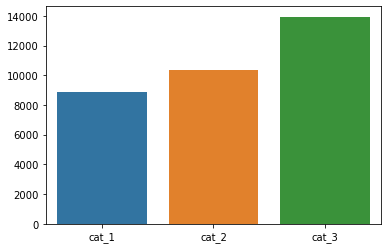

In [24]:
sns.barplot(['cat_1','cat_2','cat_3'],[cat1_mean,cat2_mean,cat3_mean])

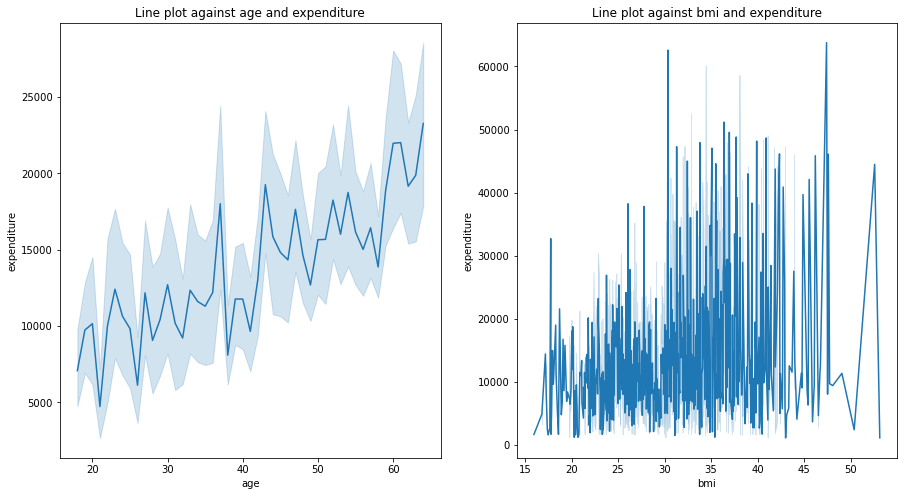

In [9]:
#13. Draw line plot of expenditure against age and bmi
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.lineplot(x = df_emp['age'],y = df_emp['expenditure'])
plt.title('Line plot against age and expenditure')

plt.subplot(1,2,2)
sns.lineplot(x = df_emp['bmi'],y = df_emp['expenditure'])
plt.title('Line plot against bmi and expenditure')

plt.show()

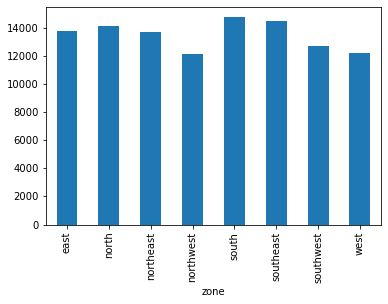

In [10]:
#14. Draw a bar chart to show zone-wise average expenditure
df_emp.groupby('zone').expenditure.mean().plot.bar()

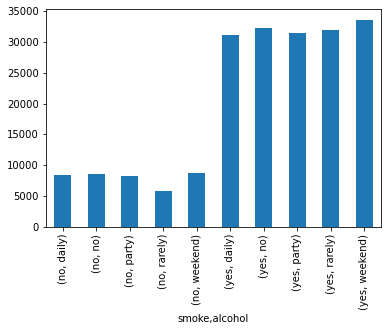

In [65]:
# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure.
df_emp.groupby(['smoke','alcohol']).expenditure.mean().plot.bar()

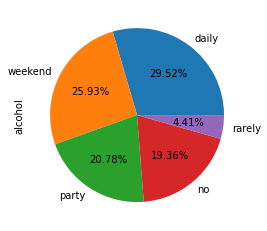

In [78]:
# 16. Draw a pie chart for alcohol consumption habits.
df_emp['alcohol'].value_counts().plot.pie(autopct='%0.2f%%')

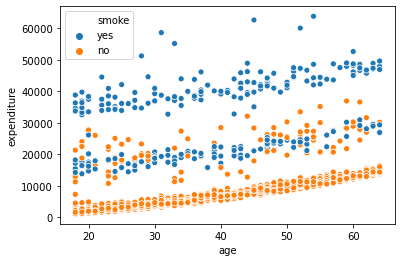

In [83]:
# 17. Draw Scatter plot to see relation between age and expenditure, keep smoking habit as hue
sns.scatterplot(df_emp['age'],df_emp['expenditure'],hue=df_emp['smoke'])

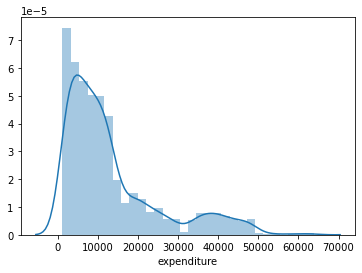

In [84]:
#18. Draw distribution plot of expenditure
sns.distplot(df_emp['expenditure'])

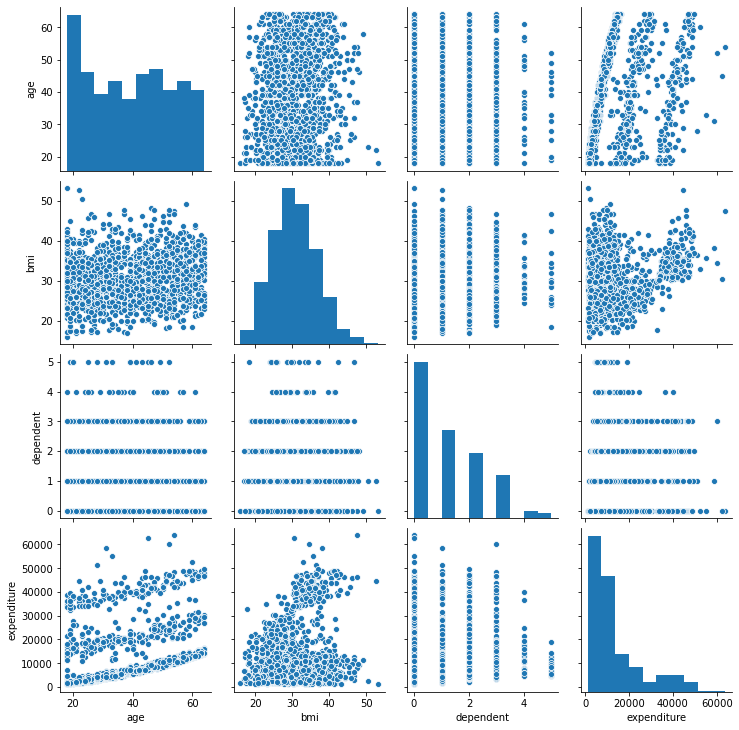

In [85]:
#19. Display the pair plot
sns.pairplot(df_emp)

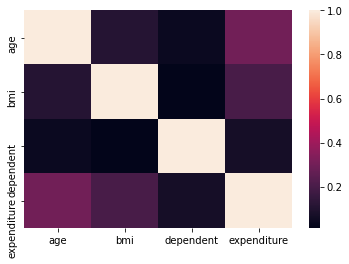

In [88]:
#20. Display heat map for the data.
sns.heatmap(df_emp.corr())
plt.show()